<a href="https://colab.research.google.com/github/gabrfern99/lia1_2024_1/blob/main/Entregas%20-%20Gabriel%20Fernando/Att_X_Construindo_um_modelinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construindo um Modelo com Tensorflow - 🐶 🐱!
## Problema: uma imagem, dizer se é um dog ou um cat.

## Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

## Treinamento: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
## Teste: 1.000 imagens de dogs e cats.
## Usa-se os dados de treino para treinar o algoritmo e então criar o modelo  preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

## Não há mágica. Há matemática! 🧙

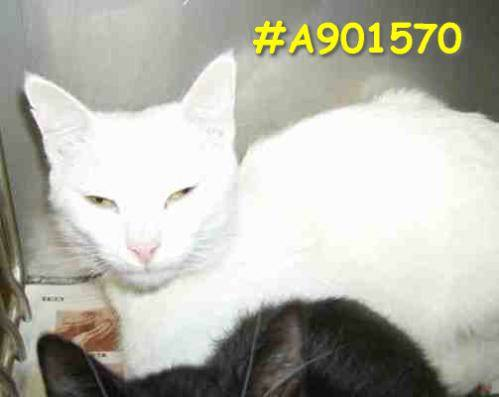

In [2]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/dataset_treino/cats/cat.9994.jpg')

Image(filename = '/content/drive/MyDrive/dataset_treino/dogs/dog.9994.jpg')

Image(filename = '/content/drive/MyDrive/dataset_teste/12497.jpg')

In [31]:
# Importar o TF, o K e suas funções necessárias
# import tensorflow as tf
import keras as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [32]:
classifier = Sequential()

In [33]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [36]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive//dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 570 images belonging to 2 classes.


In [37]:
# Executando o treinamento
classifier.fit_generator(training_set,
                         steps_per_epoch = 7,
                         epochs = 35)

<ipython-input-37-cc730de59d0d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/35
7/7 [==============================] - 26s 3s/step - loss: 0.8735 - accuracy: 0.5413
Epoch 2/35
7/7 [==============================] - 28s 5s/step - loss: 0.6974 - accuracy: 0.5134
Epoch 3/35
7/7 [==============================] - 10s 1s/step - loss: 0.6912 - accuracy: 0.5321
Epoch 4/35
7/7 [==============================] - 6s 766ms/step - loss: 0.6942 - accuracy: 0.5046
Epoch 5/35
7/7 [==============================] - 3s 401ms/step - loss: 0.6915 - accuracy: 0.4911
Epoch 6/35
7/7 [==============================] - 2s 225ms/step - loss: 0.6829 - accuracy: 0.5268
Epoch 7/35
7/7 [==============================] - 3s 412ms/step - loss: 0.6771 - accuracy: 0.5759
Epoch 8/35
7/7 [==============================] - 2s 264ms/step - loss: 0.6902 - accuracy: 0.5625
Epoch 9/35
7/7 [==============================] - 1s 168ms/step - loss: 0.6872 - accuracy: 0.5459
Epoch 10/35
7/7 [==============================] - 1s 176ms/step - loss: 0.6713 - accuracy: 0.5714
Epoch 11/35
7/7 [========

1/1 [==============================] - 0s 18ms/step
Previsão: Gato.
Acurácia: 100.0 %.


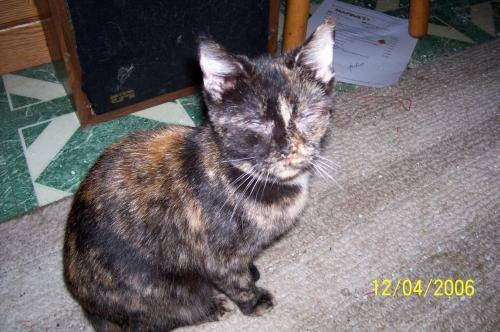

In [43]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/dataset_teste/12465.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/dataset_teste/12465.jpg')
